In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Product Sales Analysis\sales_data_cleaned.csv')

df.head(2)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,customername,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,month
0,10107,30,95.70,2,2871.0,2003-02-24,Shipped,1,2,2003,...,Land of Toys Inc.,NYC,NY,10022,USA,North America,Yu,Kwai,Small,February
1,10121,34,81.35,5,2765.9,2003-05-07,Shipped,2,5,2003,...,Reims Collectables,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small,May


In [2]:
df['orderdate'] = pd.to_datetime(df['orderdate'])
#df.info()

-  Now I will use pie chart to show the proportion of each order status relative to the total number of orders. This will help us to understand the current state of orders such as how many are shipped, pending or cancelled.

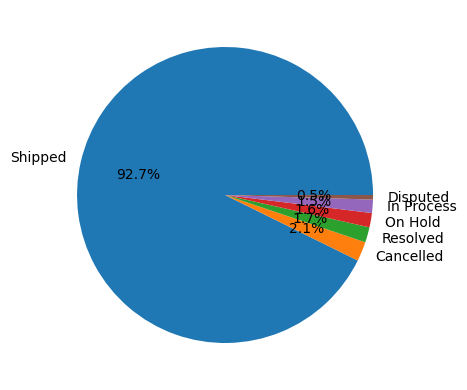

In [5]:
# Status Distribution
status_distribution = df['status'].value_counts().reset_index()
#status_distribution.columns = ['status', 'count']

plt.figure(figsize=(8, 4))
plt.pie(
    status_distribution['count'],
    labels=status_distribution['status'],
    autopct='%1.1f%%',

)

plt.tight_layout()
plt.show()


### Key Findings:

- **Shipped**:  
  - Dominates the distribution with **92.7%** of all orders.  
  - Indicates highly efficient fulfillment and delivery processes.

- **Other Statuses**:  
  - **Cancelled**: ~2.1% — relatively low, suggesting good order accuracy.  
  - **Resolved**: ~1.1% — issues addressed effectively.  
  - **On Hold**: ~1.0% — potential minor delays or pending issues.  
  - **In Process**: ~1.5% — active handling of some orders.  
  - **Disputed**: ~0.5% — minimal disputes, reflecting customer satisfaction.

-----

-   Now, I want to see the total revenue is actually realized versus how much is tied up in orders that may be at risk of cancellation or dispute.

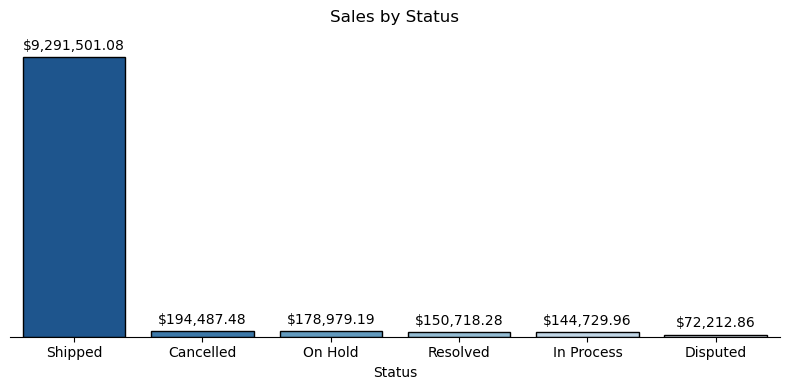

In [27]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(
    data=sales_by_status,
    x='status',
    y='sales',
    palette='Blues_r',
    edgecolor='black'
)

#plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

for container in ax.containers:
    labels = [f'${float(v.get_height()):,}' for v in container]
    ax.bar_label(container, labels=labels, padding=3)


plt.title('Sales by Status', pad=15)
plt.xlabel('Status')
ax.set_yticks([])  # Removes y-ticks
plt.ylabel('')

sns.despine(left=True)
plt.tight_layout()
plt.show()


## Insights:

- **Shipped orders dominate revenue**, confirming a **well-functioning sales pipeline**.
- The relatively **small financial impact** from **Cancelled** and **Disputed** orders suggests **low revenue leakage** due to operational or customer service issues.
- Continued monitoring of **On Hold** and **In Process** orders is advisable to avoid potential delays in revenue recognition.

-----